# Working with FOOD101 dataset

#### The three lines of code ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#### Importing all the necessary packages. 

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import errno
import os
import shutil

#### Providing the path name for the dataset

In [3]:
path = Path('/home/jupyter/fellowship/food-101/')
print(path)

/home/jupyter/fellowship/food-101


#### Lisiting the files in food-101

In [4]:
path.ls()

[PosixPath('/home/jupyter/fellowship/food-101/README.txt'),
 PosixPath('/home/jupyter/fellowship/food-101/images'),
 PosixPath('/home/jupyter/fellowship/food-101/valid'),
 PosixPath('/home/jupyter/fellowship/food-101/license_agreement.txt'),
 PosixPath('/home/jupyter/fellowship/food-101/test'),
 PosixPath('/home/jupyter/fellowship/food-101/train'),
 PosixPath('/home/jupyter/fellowship/food-101/meta'),
 PosixPath('/home/jupyter/fellowship/food-101/models')]

In [5]:
len(path.ls())

8

#### Providing a batch size, need to check if the gpu can take up that much data,

In [6]:
bs = 64
#need to check the batch size

#### Providing path for the images folder

In [7]:
path_img = path/'images'
print(path_img)

/home/jupyter/fellowship/food-101/images


In [8]:
path_img.ls()

[PosixPath('/home/jupyter/fellowship/food-101/images/carrot_cake'),
 PosixPath('/home/jupyter/fellowship/food-101/images/french_onion_soup'),
 PosixPath('/home/jupyter/fellowship/food-101/images/clam_chowder'),
 PosixPath('/home/jupyter/fellowship/food-101/images/takoyaki'),
 PosixPath('/home/jupyter/fellowship/food-101/images/breakfast_burrito'),
 PosixPath('/home/jupyter/fellowship/food-101/images/panna_cotta'),
 PosixPath('/home/jupyter/fellowship/food-101/images/baklava'),
 PosixPath('/home/jupyter/fellowship/food-101/images/seaweed_salad'),
 PosixPath('/home/jupyter/fellowship/food-101/images/strawberry_shortcake'),
 PosixPath('/home/jupyter/fellowship/food-101/images/steak'),
 PosixPath('/home/jupyter/fellowship/food-101/images/ravioli'),
 PosixPath('/home/jupyter/fellowship/food-101/images/spring_rolls'),
 PosixPath('/home/jupyter/fellowship/food-101/images/apple_pie'),
 PosixPath('/home/jupyter/fellowship/food-101/images/club_sandwich'),
 PosixPath('/home/jupyter/fellowship/foo

In [131]:
len(path_img.ls())

101

In [9]:
path_meta = path/'meta'

In [10]:
path_meta.ls()

[PosixPath('/home/jupyter/fellowship/food-101/meta/train.json'),
 PosixPath('/home/jupyter/fellowship/food-101/meta/test.txt'),
 PosixPath('/home/jupyter/fellowship/food-101/meta/train.txt'),
 PosixPath('/home/jupyter/fellowship/food-101/meta/test.json'),
 PosixPath('/home/jupyter/fellowship/food-101/meta/labels.txt'),
 PosixPath('/home/jupyter/fellowship/food-101/meta/classes.txt')]

In [11]:
path_train=path_meta/'train.txt'

In [12]:
with open(path_train) as f:
     train_list=f.read().splitlines()

#### Reading the files from the train_list

In [13]:
print(len(train_list))

75750


In [14]:
train_list[0]+'.jpg'

'apple_pie/1005649.jpg'

#### Getting the classes from the class file

In [15]:
path_class = path/'meta/classes.txt'
with open(path_class) as f:
    classes = f.read().splitlines()
print(classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

#### Creating directories from test and train dataset

In [18]:
os.makedirs(path/'test')
os.makedirs(path/'train')
#os.makedirs(path/'valid')

#### Creating classes directories from train dataset

In [19]:
for i in range(len(classes)):
    os.makedirs('/home/jupyter/fellowship/food-101/train/'+classes[i])

checking for one file 
#shutil.copy('/home/jupyter/fellowship/food-101/images/'+train_list[0]+'.jpg','/home/jupyter/fellowship/food-101/train/'+train_list[0]+'.jpg')

#### Copying the data from the images folder to the train folder

In [20]:
for i in range(len(train_list)):
    #shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    shutil.copy('/home/jupyter/fellowship/food-101/images/'+train_list[i]+'.jpg','/home/jupyter/fellowship/food-101/train/'+train_list[i]+'.jpg')
    

In [16]:
path_img_train=path/'train'
len(path_img_train.ls())

101

In [22]:
!ls

fellowhip-FOOD101.ipynb  food-101.tar.gz		       Untitled.ipynb
food-101		 open?id=0B7EVK8r0v71pWEZsZE9oNnFzTm8


#### Creating classes directories from test dataset

In [23]:
for i in range(len(classes)):
    os.makedirs('/home/jupyter/fellowship/food-101/test/'+classes[i])

#### Reading the files from the test_list

In [17]:
path_test=path_meta/'test.txt'

In [18]:
with open(path_test) as f:
     test_list=f.read().splitlines()

In [19]:
print(len(test_list))

25250


In [20]:
print(test_list[0])

apple_pie/1011328


#### Copying the data from the images folder to the train folder

In [30]:
for i in range(len(test_list)):
    #shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    shutil.copy('/home/jupyter/fellowship/food-101/images/'+test_list[i]+'.jpg','/home/jupyter/fellowship/food-101/test/'+test_list[i]+'.jpg')

In [21]:
path_img_test=path/'test'
len(path_img_test.ls())

101

In [23]:
print(len(os.listdir(path_img_train)))

101


NameError: name 'path_img_valid' is not defined

In [24]:
??ImageDataBunch.from_folder

In [25]:
path

PosixPath('/home/jupyter/fellowship/food-101')

In [26]:
path_img_train

PosixPath('/home/jupyter/fellowship/food-101/train')

#### Getting the data from the folders, size is specified

In [61]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train="train", valid="test",ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

#### Printing the length of training and testing

In [28]:
len(data.train_ds), len(data.valid_ds)

(75750, 25250)

In [29]:
data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [29]:
print(len(data.classes))


101


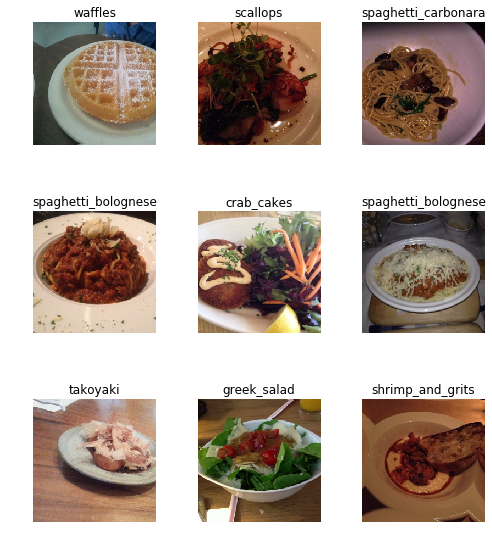

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [30]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,2.125558,1.505197,0.400317,13:19
2,1.805222,1.227178,0.327842,12:49
3,1.654382,1.096082,0.293663,12:47
4,1.524474,1.059225,0.284356,12:44


In [32]:
learn.save('stage-1-34')

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

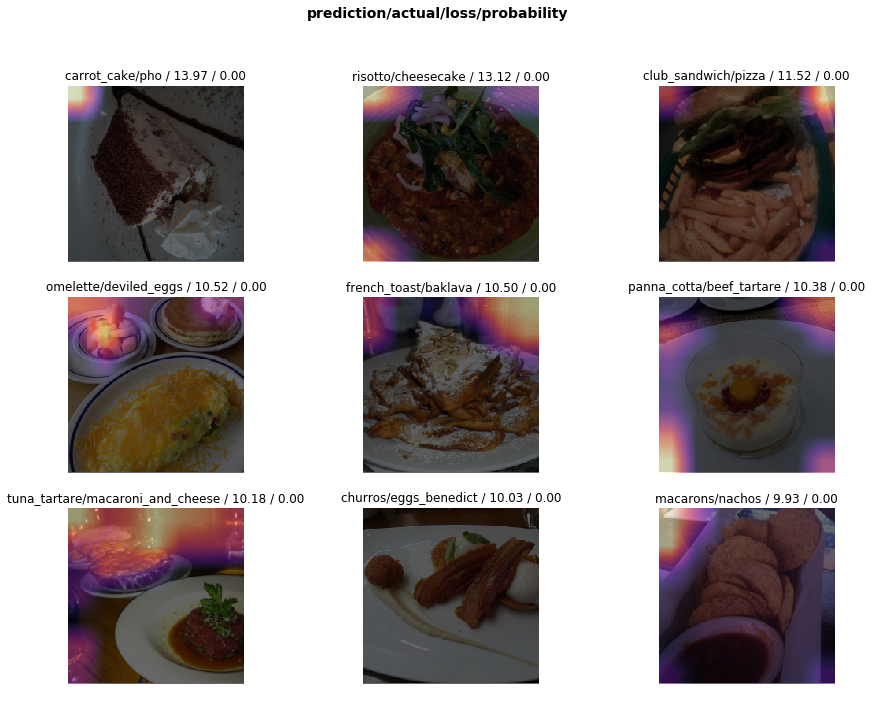

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

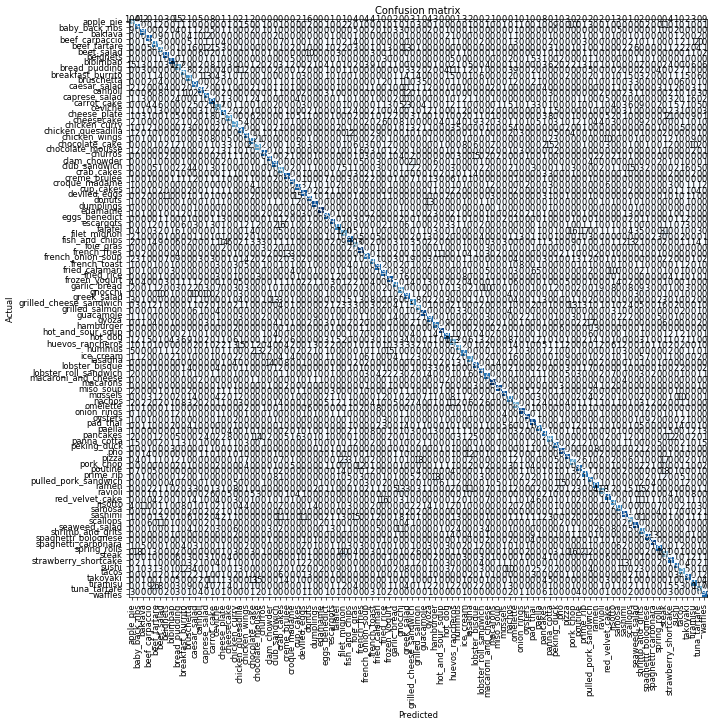

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused(min_val=2)

[('steak', 'filet_mignon', 40),
 ('filet_mignon', 'steak', 31),
 ('tuna_tartare', 'beef_tartare', 26),
 ('ceviche', 'greek_salad', 23),
 ('pork_chop', 'filet_mignon', 23),
 ('cheesecake', 'strawberry_shortcake', 21),
 ('chocolate_cake', 'chocolate_mousse', 21),
 ('chocolate_mousse', 'chocolate_cake', 21),
 ('club_sandwich', 'grilled_cheese_sandwich', 21),
 ('steak', 'prime_rib', 21),
 ('beef_tartare', 'tuna_tartare', 20),
 ('pork_chop', 'grilled_salmon', 18),
 ('prime_rib', 'steak', 18),
 ('pulled_pork_sandwich', 'hamburger', 18),
 ('steak', 'baby_back_ribs', 18),
 ('filet_mignon', 'prime_rib', 17),
 ('hamburger', 'pulled_pork_sandwich', 17),
 ('pork_chop', 'steak', 17),
 ('falafel', 'crab_cakes', 16),
 ('filet_mignon', 'pork_chop', 16),
 ('risotto', 'fried_rice', 16),
 ('steak', 'pork_chop', 16),
 ('apple_pie', 'bread_pudding', 15),
 ('bread_pudding', 'apple_pie', 15),
 ('chocolate_mousse', 'panna_cotta', 15),
 ('clam_chowder', 'lobster_bisque', 15),
 ('crab_cakes', 'scallops', 15),
 

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
1,1.638733,1.307304,0.354257,13:11
2,1.042651,0.700189,0.193109,13:11


In [39]:
learn.save('stage-1-34-new')

In [40]:
learn.load('stage-1-34-new');

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


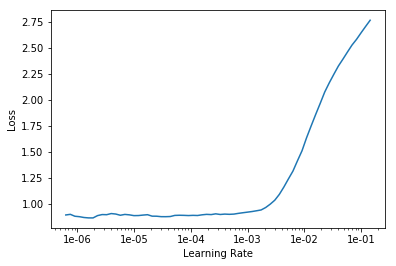

In [42]:
learn.recorder.plot()

In [43]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.908507,0.677650,0.186416,13:18
2,0.866087,0.658682,0.183960,13:19
3,0.818304,0.656430,0.182416,13:15


In [44]:
learn.save('stage-1-34-new1')

In [45]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,p_affine=1., p_lighting=1.)

In [46]:
data_source = ImageList.from_folder(path).split_by_folder(train="train", valid="test")

In [47]:
def get_new_data(size, bs, padding_mode='reflection'):
    return (data_source.label_from_folder().transform(tfms, size=size, padding_mode=padding_mode).databunch(bs=bs//2).normalize(imagenet_stats))

In [48]:
new_data = get_new_data(224, 40, 'reflection')

In [49]:
learn = create_cnn(new_data, models.resnet34, metrics=error_rate)

In [50]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,2.492564,1.615018,0.424000,13:33
2,2.144611,1.326293,0.350218,13:30
3,1.891387,1.171706,0.311881,13:31
4,1.886463,1.123967,0.299723,13:31


In [56]:
learn.save('stage-1-34-augmentation')

In [57]:
learn.unfreeze()

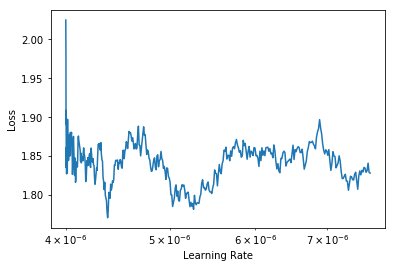

In [58]:
learn.recorder.plot()

In [59]:
learn.load('stage-1-34-augmentation');

In [60]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,1.734825,1.029811,0.275802,14:04
2,1.580540,0.929218,0.251089,13:56
3,1.576275,0.901517,0.244554,13:44


In [62]:
learn.save('stage-1-34-augmentation-new');

In [63]:
learn = create_cnn(new_data, models.resnet50, metrics=error_rate)

In [64]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
1,2.219184,1.461030,0.386337,15:31
2,1.887946,1.234143,0.337941,15:25
3,1.866228,1.074659,0.294733,15:20
4,1.651550,0.963374,0.260673,15:23
5,1.565848,0.877139,0.238693,15:22
6,1.486919,0.828319,0.228475,15:22
7,1.385295,0.790571,0.219802,15:19
8,1.343778,0.780695,0.216158,15:48


In [65]:
learn.save('stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


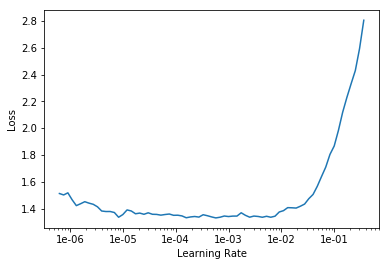

In [66]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
1,1.374117,0.759662,0.208752,19:54
2,1.349545,0.730253,0.202337,20:05
3,1.288046,0.694303,0.195208,20:00
4,1.172663,0.646155,0.179208,20:01
5,0.999544,0.602901,0.168911,19:49
6,1.019589,0.554962,0.155842,19:55
7,0.855234,0.519866,0.146099,19:47
8,0.765951,0.500502,0.140436,19:49
9,0.669260,0.485474,0.134614,19:49
10,0.706300,0.486873,0.135208,19:49


In [68]:
learn.save('stage-1-50-new') 

In [ ]:
learn.load('stage-1-50-new');